In [ ]:
import requests 
file_url = "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"
  
r = requests.get(file_url, stream = True) 
  
with open("CrimesChicago.csv","wb") as csv: 
    for chunk in r.iter_content(chunk_size=2048): 
  
         # writing one chunk at a time to pdf file 
         if chunk: 
             csv.write(chunk)
         
                

In [ ]:
# Code to insert data into NoSQL Database


import csv
import json
import pandas as pd
import sys, getopt, pprint
from pymongo import MongoClient

#CSV to JSON Conversion
csvfile = open('C://Study//Steerwise//CrimesChicago.csv', 'r')
reader = csv.DictReader( csvfile )

#Db Client

client = MongoClient('localhost', 27017)
Crimes = client.Crimes
collection = Crimes.collection

# Header Definition
header= [ "ID","Case Number","Date","Block","IUCR","Primary Type","Description","Location Description","Arrest","Domestic","Beat","District","Ward","Community Area","FBI Code","X Coordinate","Y Coordinate","Year","Updated On","Latitude","Longitude","Location"]

# Iterating through each row and inserting the data
for each in reader:
    row={}
    for field in header:
        row[field]=each[field]

    Crimes.collection.insert_one(row)

In [36]:
# Data Cleaning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

# load Data Set
crimes = pd.read_csv('C://Study//Steerwise//CrimesChicago.csv',error_bad_lines=False,index_col=False, dtype='unicode')
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
crimes.head(5)

#Format the Date column
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)



In [37]:
# Drop the rows with missing values: This is done since the number of rows with missing values is very negligible 
# compared to the actual data rows.
crimes = crimes.dropna();
crimes = crimes.fillna(" ")


In [38]:
crimes.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,...,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,10000094,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,true,false,...,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773371528,-87.665319468,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,10000095,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,...,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.81386068,-87.596642837,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,false,false,...,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802415,-87.622619343,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,10000097,HY189976,2015-03-18 21:00:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,false,false,...,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878064761,-87.743354013,"(41.878064761, -87.743354013)"


In [39]:
# creating the categorical values for the relevant 
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

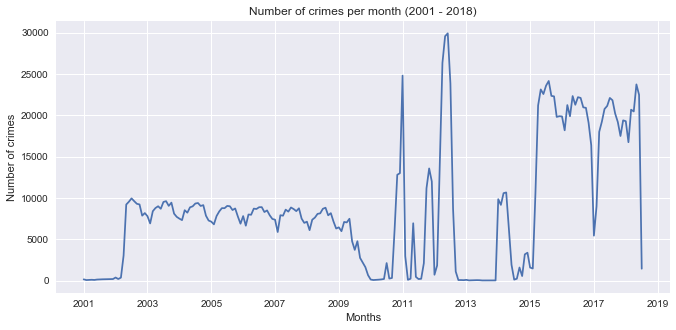

In [40]:
#  Plot the crimes in monthly fashion
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

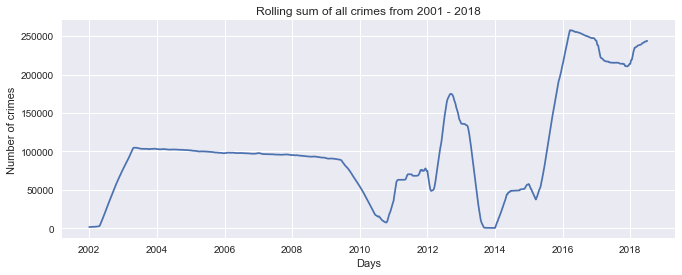

In [41]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

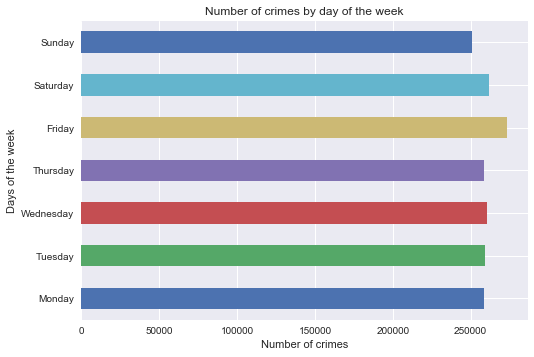

In [42]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

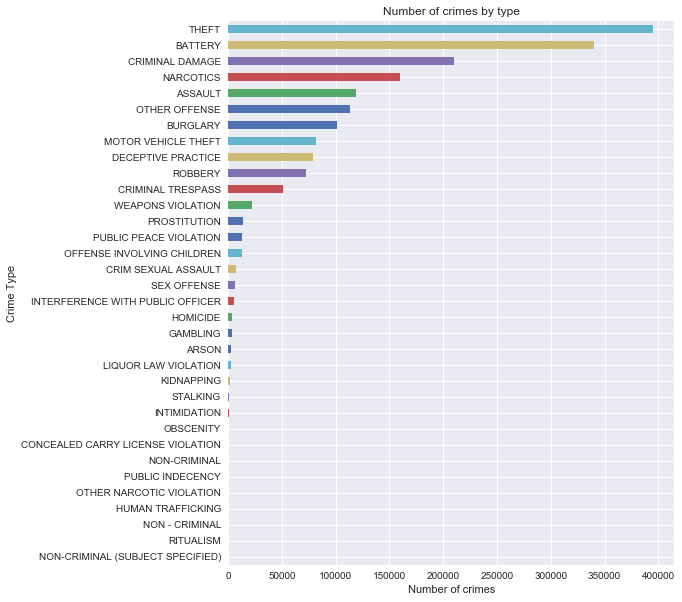

In [43]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

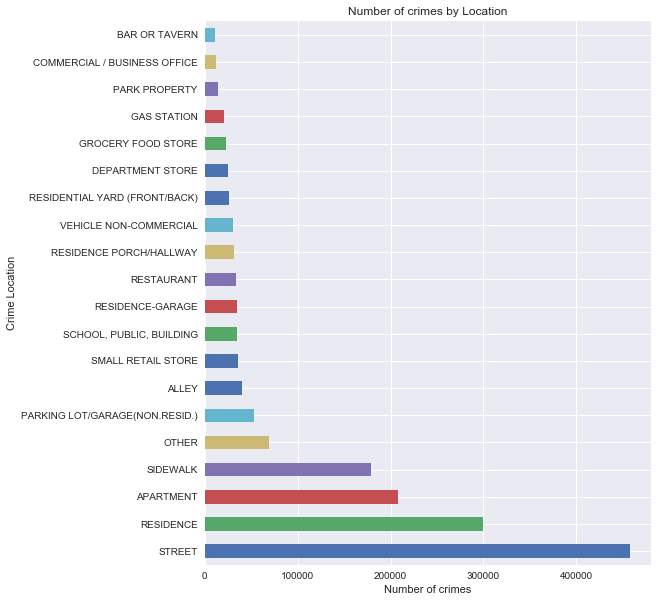

In [51]:
plt.figure(figsize=(8,10))
temp = crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=False)
tempTop20 = temp.head(20)
tempTop20.plot(kind="barh")
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [52]:
#normalizing to get 1 value for a month
#coonsidering both location and primary type
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)
from sklearn.cluster import AgglomerativeClustering as AC
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result



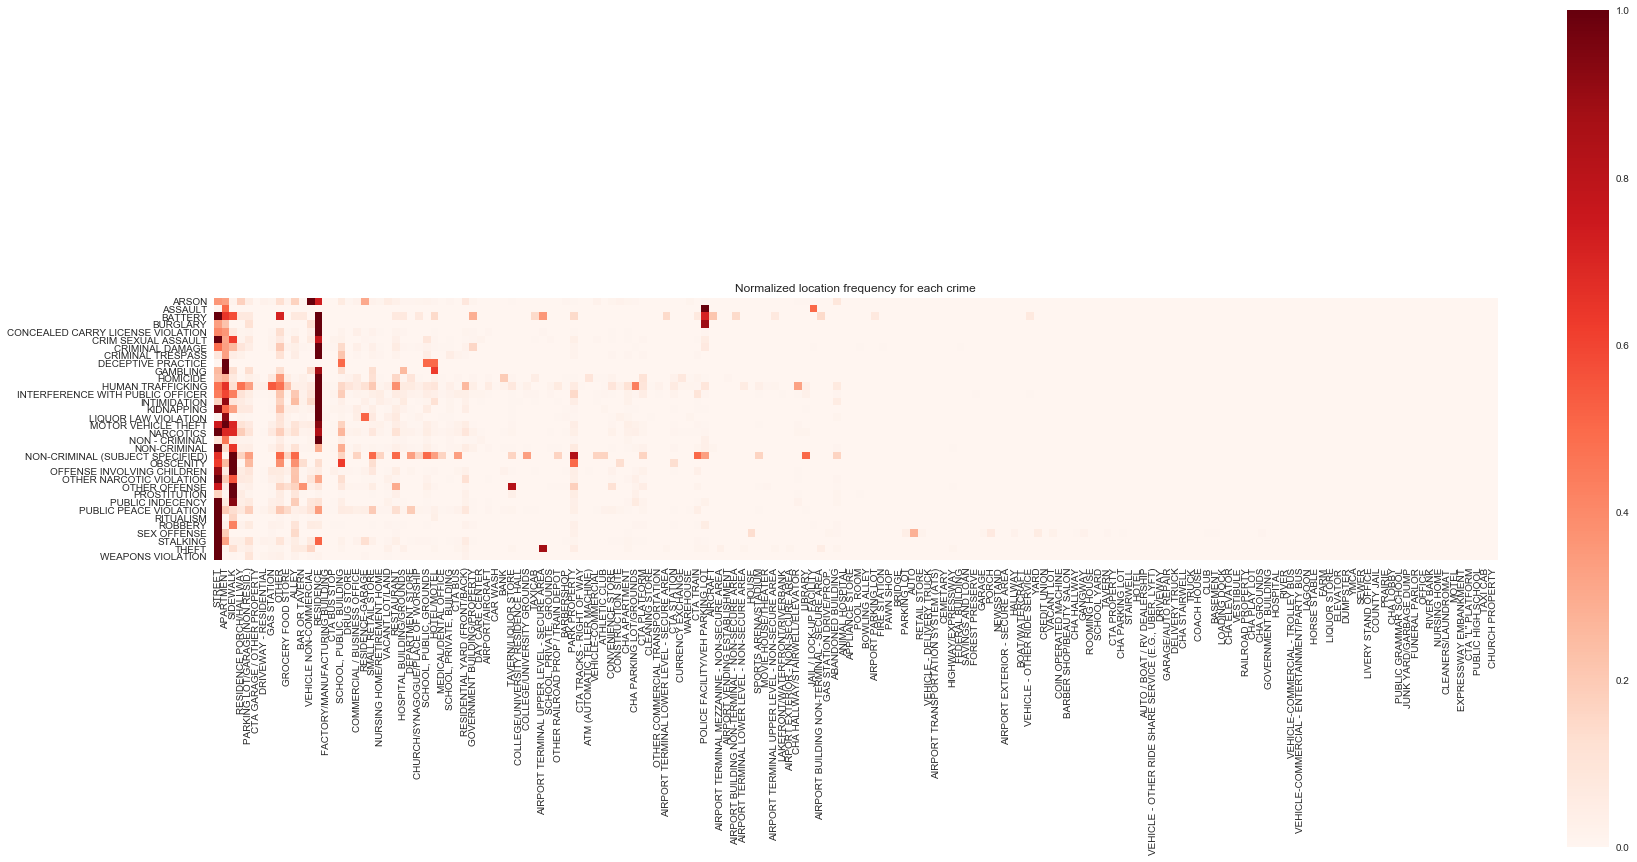

In [53]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() 
plt.figure(figsize=(25,20))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [55]:
# For a specific Primary Type ie THEFT
crimes_theft = crimes[crimes['Primary Type'] == "THEFT"]
crimes_theft['Date'].min(), crimes_theft['Date'].max()
crimes_theft = crimes_theft.sort_values('Date')

C:\Users\bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
import statsmodels.api as sm
#crimes_theft.groupby(pd.Grouper(key='Date',freq='A')).Val.apply(mode)

crimes_theft = crimes[crimes['Primary Type'] == "THEFT"]
crimes_theft = crimes_theft.groupby([crimes_theft['Date']]).size()
crimes_theft.head(5)


Date
2001-01-01 00:00:00    17
2001-01-01 00:01:00    13
2001-01-01 08:00:00     2
2001-01-01 09:00:00    12
2001-01-01 12:00:00     4
dtype: int64

In [62]:
# Relative sampling based on Month 
crimes_theft.head(5)
crimes_theft = crimes_theft.dropna()
crimes_theft = crimes_theft.fillna("0")
#crimes_theft['sum'] = crimes_theft[1].sum()
plottable = crimes_theft.resample('MS').mean()

In [65]:

plottable[np.isnan(plottable)] = 1
plottable.dropna()
plottable['2013':]


Date
2013-01-01    1.000000
2013-02-01    1.000000
2013-03-01    1.000000
2013-04-01    1.000000
2013-05-01    1.000000
2013-06-01    1.000000
2013-07-01    1.000000
2013-08-01    1.000000
2013-09-01    1.000000
2013-10-01    1.000000
2013-11-01    1.000000
2013-12-01    1.000000
2014-01-01    1.511263
2014-02-01    1.524701
2014-03-01    1.484375
2014-04-01    1.492670
2014-05-01    1.441020
2014-06-01    1.309375
2014-07-01    1.000000
2014-08-01    1.051282
2014-09-01    1.171233
2014-10-01    1.123810
2014-11-01    1.315603
2014-12-01    1.310646
2015-01-01    1.126812
2015-02-01    1.161943
2015-03-01    1.670741
2015-04-01    1.826845
2015-05-01    1.814924
2015-06-01    1.881439
                ...   
2016-02-01    1.675745
2016-03-01    1.729032
2016-04-01    1.669707
2016-05-01    1.743442
2016-06-01    1.727108
2016-07-01    1.834798
2016-08-01    1.834356
2016-09-01    1.838467
2016-10-01    1.812323
2016-11-01    1.762012
2016-12-01    1.612890
2017-01-01    1.447953
2017-0

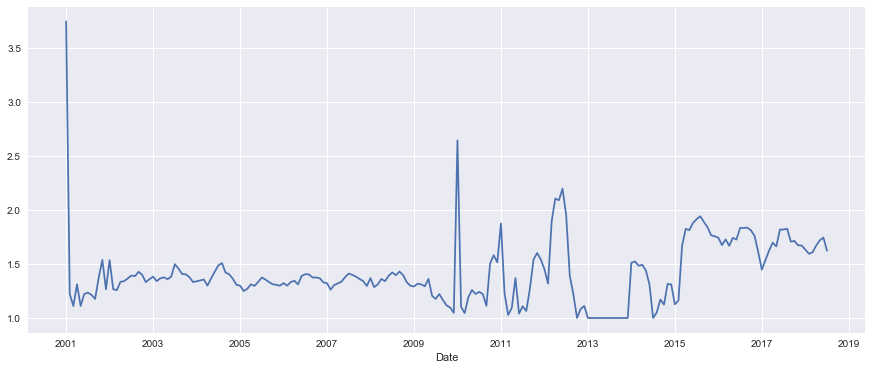

In [66]:
plottable.plot(figsize=(15, 6))
plt.show()

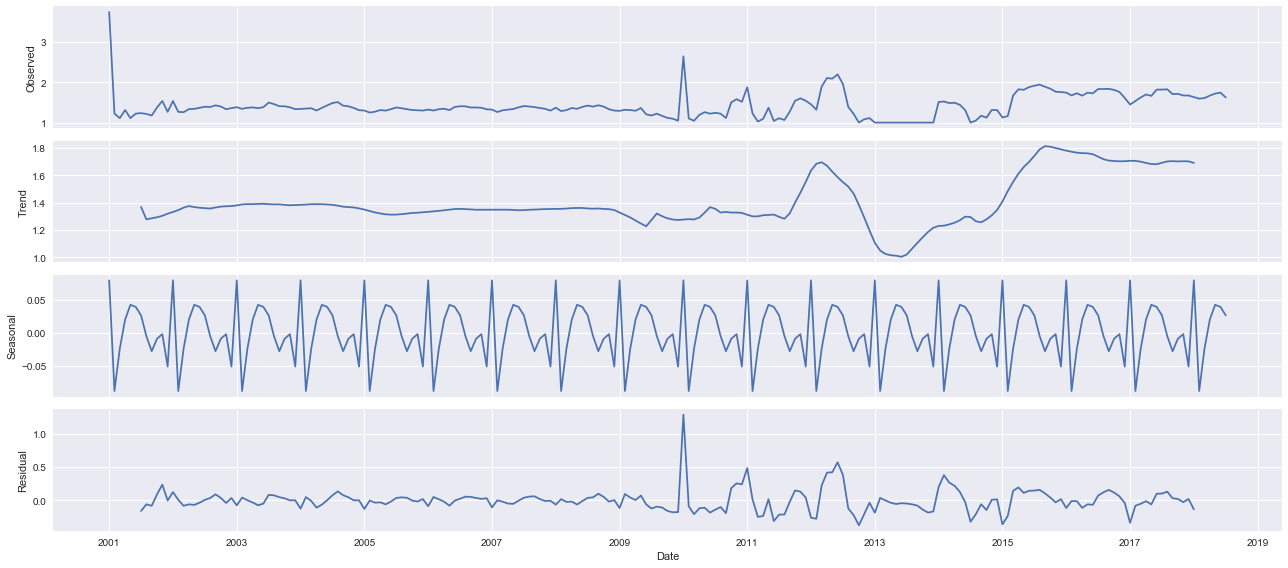

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(plottable, model='additive')
fig = decomposition.plot()
plt.show()

In [68]:
# Finding the Parameter combination to feed to the SARIMAX Function of ARIMA Model
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [69]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(plottable,order=param,seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.8352977353027


C:\Users\bharath\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1052: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not params_seasonal_variance == []:


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:534.2936914488539
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:130.93721460442558
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:65.74413493534328
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:169.5133125584208
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:51.276716019441245
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:107.35022459515324


C:\Users\bharath\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:70.9332557491492
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:508.9583469573556
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:342.50017954269816
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:50.86608054073442

C:\Users\bharath\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1051: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.state_error and params_variance == []:



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-13.226147464500244
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:98.26869572321449
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-25.87887078804681
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:32.64871956217879
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-8.307750142724053
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-75.2592422820704
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-71.94626939205597
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:36.103792158403536
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-13.42908735412793
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-73.24469299892812
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-70.21420276502374
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:22.15655534308202
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-36.07666421803217
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-97.30993630276134
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-87.46459930714309
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:26.09318449722319
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-55.571620079326536
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-90.193556000

In [70]:
# Choosing the values with the lowest AIC as per the above step
#ARIMA(0, 1, 1)x(0, 0, 0, 12)12  -  AIC 16.06

mod = sm.tsa.statespace.SARIMAX(plottable,
                                order=(0, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\bharath\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1051: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.state_error and params_variance == []:


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3959      0.025    -15.975      0.000      -0.445      -0.347
sigma2         0.0360      0.001     35.090      0.000       0.034       0.038


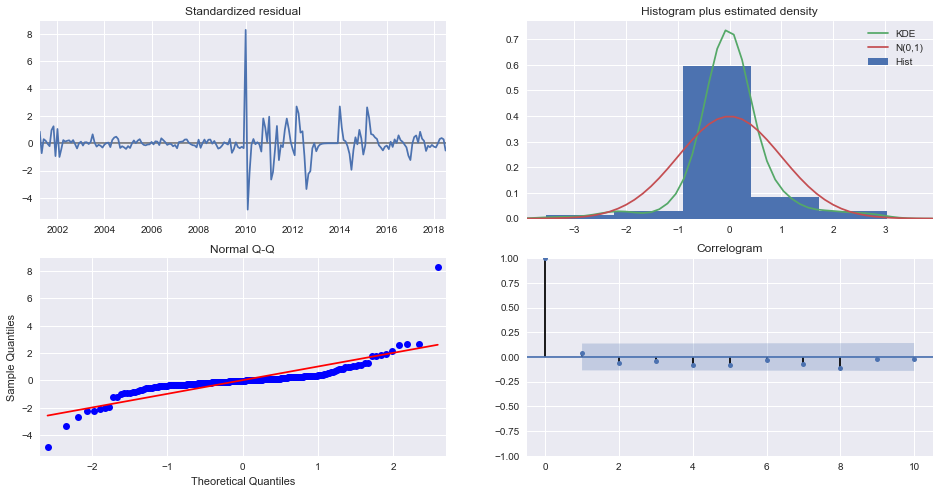

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

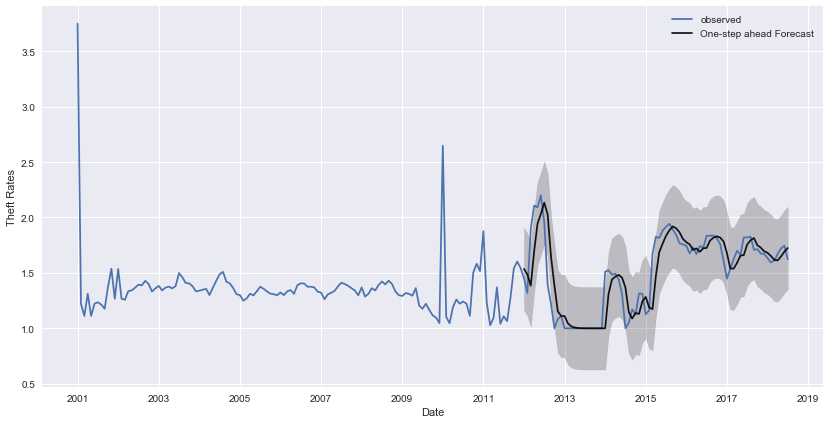

In [72]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)

pred_ci = pred.conf_int()
#print(pred)
ax = plottable['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9,color='k', figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Theft Rates')
plt.legend()
plt.show()

In [73]:
plottable_forecasted = pred.predicted_mean
print(plottable_forecasted)
plottable_truth = plottable['2001-01-01':]
mse = ((plottable_forecasted - plottable_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

Date
2012-01-01    1.536307
2012-02-01    1.485882
2012-03-01    1.385274
2012-04-01    1.693400
2012-05-01    1.943669
2012-06-01    2.033088
2012-07-01    2.133308
2012-08-01    2.027349
2012-09-01    1.643369
2012-10-01    1.386772
2012-11-01    1.153141
2012-12-01    1.110973
2013-01-01    1.111056
2013-02-01    1.043972
2013-03-01    1.017411
2013-04-01    1.006894
2013-05-01    1.002729
2013-06-01    1.001081
2013-07-01    1.000428
2013-08-01    1.000169
2013-09-01    1.000067
2013-10-01    1.000027
2013-11-01    1.000011
2013-12-01    1.000004
2014-01-01    1.000002
2014-02-01    1.308832
2014-03-01    1.439228
2014-04-01    1.466499
2014-05-01    1.482308
2014-06-01    1.457368
                ...   
2016-02-01    1.757553
2016-03-01    1.708136
2016-04-01    1.720759
2016-05-01    1.689921
2016-06-01    1.722251
2016-07-01    1.725185
2016-08-01    1.791397
2016-09-01    1.817347
2016-10-01    1.830105
2016-11-01    1.819363
2016-12-01    1.784720
2017-01-01    1.680925
2017-0

In [74]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.18


             lower y   upper y
2018-08-01  1.291591  2.035028
2018-09-01  1.229037  2.097581
2018-10-01  1.174423  2.152196
2018-11-01  1.125325  2.201294
2018-12-01  1.080347  2.246271
2019-01-01  1.038600  2.288019
2019-02-01  0.999472  2.327147
2019-03-01  0.962526  2.364093
2019-04-01  0.927432  2.399186
2019-05-01  0.893938  2.432681
2019-06-01  0.861842  2.464777
2019-07-01  0.830983  2.495636
2019-08-01  0.801228  2.525391
2019-09-01  0.772466  2.554153
2019-10-01  0.744604  2.582015
2019-11-01  0.717562  2.609056
2019-12-01  0.691273  2.635346
2020-01-01  0.665676  2.660943
2020-02-01  0.640719  2.685899
2020-03-01  0.616358  2.710261
2020-04-01  0.592550  2.734069
2020-05-01  0.569261  2.757358
2020-06-01  0.546456  2.780162
2020-07-01  0.524109  2.802510
2020-08-01  0.502191  2.824428
2020-09-01  0.480680  2.845939
2020-10-01  0.459553  2.867066
2020-11-01  0.438790  2.887829
2020-12-01  0.418373  2.908245
2021-01-01  0.398286  2.928332
2021-02-01  0.378513  2.948105
2021-03-

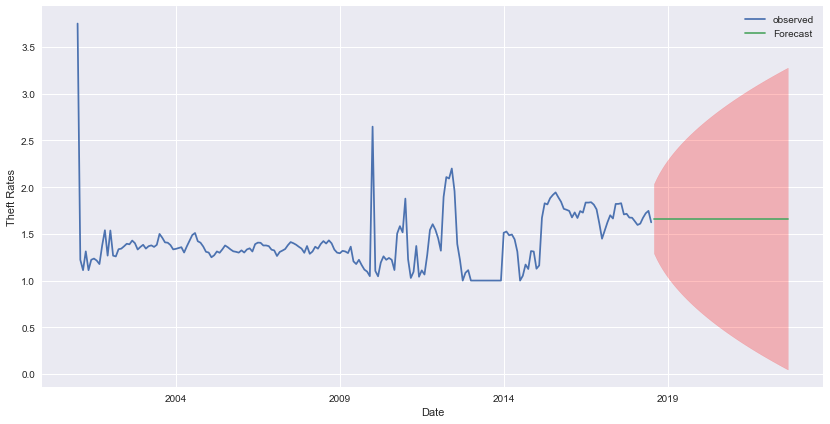

In [75]:
pred_uc = results.get_forecast(steps=50)

pred_ci = pred_uc.conf_int()
print(pred_ci)
ax = plottable.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Theft Rates')
plt.legend()
plt.show()

In [76]:
crimes_theft = crimes[crimes['Primary Type'] == "THEFT"]
df_theft = pd.DataFrame(crimes_theft)

#df_theft = df_theft.rename(columns={'Order Date': 'Date'})
df_theft['Sum'] = df_theft.groupby([df_theft['Date']]).size().sort_values(ascending=True)

#df_theft['Sum'] = df_theft.groupby([df_theft['Date']]).transform('sum')
df_theft.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Sum
Date,,,,,,,,,,,,,,,,,,,,,
2009-06-16 21:00:00,6976197,HR379041,2009-06-16 21:00:00,116XX S PRAIRIE AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,false,false,...,53,06,1180004,1827622,2009,02/10/2018 03:50:01 PM,41.682261016,-87.616709852,"(41.682261016, -87.616709852)",2
2009-06-17 14:45:00,6976243,HR380463,2009-06-17 14:45:00,061XX S TROY ST,0810,THEFT,OVER $500,STREET,false,false,...,66,06,1156440,1863690,2009,02/10/2018 03:50:01 PM,41.781743233,-87.701999985,"(41.781743233, -87.701999985)",1
2009-06-16 23:00:00,6976262,HR380900,2009-06-16 23:00:00,006XX N PULASKI RD,0820,THEFT,$500 AND UNDER,CTA GARAGE / OTHER PROPERTY,false,false,...,23,06,1149603,1904222,2009,02/10/2018 03:50:01 PM,41.893103409,-87.726015723,"(41.893103409, -87.726015723)",5
2009-05-24 21:00:00,6976282,HR339401,2009-05-24 21:00:00,005XX N MICHIGAN AVE,0810,THEFT,OVER $500,STREET,false,false,...,8,06,1177337,1904039,2009,02/10/2018 03:50:01 PM,41.892017399,-87.624165306,"(41.892017399, -87.624165306)",2
2009-06-17 14:00:00,6976348,HR381036,2009-06-17 14:00:00,004XX W OAK ST,0810,THEFT,OVER $500,STREET,false,false,...,8,06,1173235,1907082,2009,02/10/2018 03:50:01 PM,41.900459608,-87.639139588,"(41.900459608, -87.639139588)",2


In [77]:
df_theft = df_theft.rename(columns={'Date': 'ds', 'Sum': 'y'})
df_theft.tail()

,ID,Case Number,ds,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,y
Date,,,,,,,,,,,,,,,,,,,,,
2009-06-16 21:00:00,6976197,HR379041,2009-06-16 21:00:00,116XX S PRAIRIE AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,false,false,...,53,06,1180004,1827622,2009,02/10/2018 03:50:01 PM,41.682261016,-87.616709852,"(41.682261016, -87.616709852)",2
2009-06-17 14:45:00,6976243,HR380463,2009-06-17 14:45:00,061XX S TROY ST,0810,THEFT,OVER $500,STREET,false,false,...,66,06,1156440,1863690,2009,02/10/2018 03:50:01 PM,41.781743233,-87.701999985,"(41.781743233, -87.701999985)",1
2009-06-16 23:00:00,6976262,HR380900,2009-06-16 23:00:00,006XX N PULASKI RD,0820,THEFT,$500 AND UNDER,CTA GARAGE / OTHER PROPERTY,false,false,...,23,06,1149603,1904222,2009,02/10/2018 03:50:01 PM,41.893103409,-87.726015723,"(41.893103409, -87.726015723)",5
2009-05-24 21:00:00,6976282,HR339401,2009-05-24 21:00:00,005XX N MICHIGAN AVE,0810,THEFT,OVER $500,STREET,false,false,...,8,06,1177337,1904039,2009,02/10/2018 03:50:01 PM,41.892017399,-87.624165306,"(41.892017399, -87.624165306)",2
2009-06-17 14:00:00,6976348,HR381036,2009-06-17 14:00:00,004XX W OAK ST,0810,THEFT,OVER $500,STREET,false,false,...,8,06,1173235,1907082,2009,02/10/2018 03:50:01 PM,41.900459608,-87.639139588,"(41.900459608, -87.639139588)",2


In [78]:
import datetime as dt
df_theft['ds'] = pd.to_datetime(df_theft['ds'])

df_theft_2016 = df_theft[df_theft['ds'].dt.year > 2016]

df_theft_2016

,ID,Case Number,ds,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,y
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-06 13:30:00,11086755,JA430240,2017-09-06 13:30:00,032XX W 26TH ST,0810,THEFT,OVER $500,OTHER,true,false,...,30,06,1155313,1886555,2017,02/11/2018 03:54:58 PM,41.844510467,-87.705519454,"(41.844510467, -87.705519454)",2
2017-12-02 14:45:00,11166132,JA533860,2017-12-02 14:45:00,112XX S INDIANA AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),false,false,...,49,06,1179573,1830461,2017,02/12/2018 03:46:59 PM,41.69006147,-87.618201285,"(41.69006147, -87.618201285)",2
2017-11-08 18:34:00,11143821,JA504356,2017-11-08 18:34:00,0000X N STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,true,false,...,32,06,1176364,1900524,2017,02/14/2018 03:49:00 PM,41.882394062,-87.627844798,"(41.882394062, -87.627844798)",1
2017-01-16 01:10:00,10817343,JA117590,2017-01-16 01:10:00,055XX S PRAIRIE AVE,0820,THEFT,$500 AND UNDER,STREET,false,false,...,40,06,1178989,1868154,2017,02/10/2018 03:50:01 PM,41.793508827,-87.619194139,"(41.793508827, -87.619194139)",1
2017-01-06 23:00:00,10807989,JA106895,2017-01-06 23:00:00,003XX N HALSTED ST,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),false,false,...,28,06,1170974,1902779,2017,02/10/2018 03:50:01 PM,41.888701814,-87.647570608,"(41.888701814, -87.647570608)",1
2017-01-07 21:45:00,10809346,JA107884,2017-01-07 21:45:00,021XX N DOMINICK ST,0820,THEFT,$500 AND UNDER,STREET,false,false,...,7,06,1165998,1914330,2017,02/10/2018 03:50:01 PM,41.920506206,-87.665514018,"(41.920506206, -87.665514018)",1
2017-01-08 21:35:00,10809564,JA108720,2017-01-08 21:35:00,002XX N WESTERN AVE,0820,THEFT,$500 AND UNDER,GAS STATION,false,false,...,28,06,1160371,1901450,2017,02/10/2018 03:50:01 PM,41.885280845,-87.686545515,"(41.885280845, -87.686545515)",1
2017-01-06 21:59:00,10809623,JA106753,2017-01-06 21:59:00,094XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,false,false,...,73,06,1167331,1841881,2017,02/10/2018 03:50:01 PM,41.72166994,-87.662694015,"(41.72166994, -87.662694015)",1
2017-01-08 18:30:00,10810303,JA108615,2017-01-08 18:30:00,017XX N MILWAUKEE AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,false,false,...,24,06,1161636,1911585,2017,02/10/2018 03:50:01 PM,41.913065827,-87.681617486,"(41.913065827, -87.681617486)",1


In [79]:
from fbprophet import Prophet


#df_theft = df_theft.rename(columns={'Date': 'ds', 'Sum': 'y'})
df_theft_model = Prophet(interval_width=0.95)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\bharath\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Text(0.5,1,'Theft Rate')

<Figure size 1296x432 with 0 Axes>

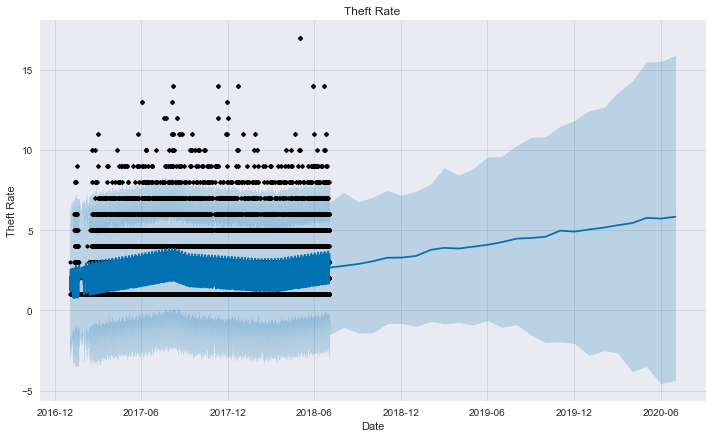

In [80]:
df_theft_model.fit(df_theft_2016)
df_theft_forecast = df_theft_model.make_future_dataframe(periods=24, freq='MS')
df_theft_forecast = df_theft_model.predict(df_theft_forecast)
#df_theft_forecast.tail()
plt.figure(figsize=(18, 6))
df_theft_model.plot(df_theft_forecast, xlabel = 'Date', ylabel = 'Theft Rate')
plt.title('Theft Rate')
#plt.show()

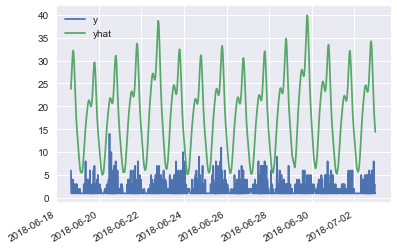

In [17]:
two_Values = df_theft_forecast.set_index('ds').join(df_theft_2016)
two_Values = two_Values[['y', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(8000)
two_Values['yhat']=np.exp(two_Values.yhat)
two_Values['yhat_upper']=np.exp(two_Values.yhat_upper)
two_Values['yhat_lower']=np.exp(two_Values.yhat_lower)
two_Values[['y', 'yhat']].plot()

In [23]:
from sklearn.metrics import r2_score
r2_score(two_Values.y, two_Values.yhat)


-42.05663337359669

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(two_Values.y, two_Values.yhat)

367.1088619860532

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(two_Values.y, two_Values.yhat)

17.89943509426643

Text(0.5,0,'Date')

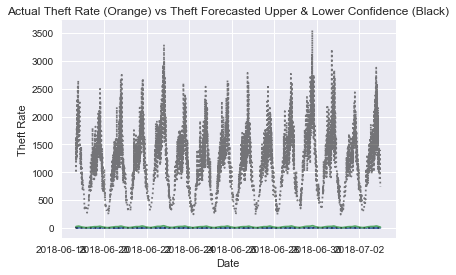

In [27]:


fig, ax1 = plt.subplots()
ax1.plot(two_Values.y)
ax1.plot(two_Values.yhat)
ax1.plot(two_Values.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_Values.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual Theft Rate (Orange) vs Theft Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Theft Rate')
ax1.set_xlabel('Date')

